<a href="https://colab.research.google.com/github/joseluis-hd/Machine-Learning-25A/blob/main/Simple%20linear%20regression/pract_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1: Regresión lineal simple**
José Luis Haro Díaz


In [ ]:
#Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Cargar datos
full_data_file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje - Máquina/datasets/car_purchasing.csv', header=0, encoding='latin-1')
full_data_file

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
#Mostrar solo columnas de annual salary y purchase amount
data_file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje - Máquina/car_purchasing.csv", usecols=[5, 8], encoding="latin-1")
data_file

,annual Salary,car purchase amount
0,62812.09301,35321.45877
1,66646.89292,45115.52566
2,53798.55112,42925.70921
3,79370.03798,67422.36313
4,59729.15130,55915.46248
...,...,...
495,71942.40291,48901.44342
496,56039.49793,31491.41457
497,68888.77805,64147.28888
498,49811.99062,45442.15353


In [ ]:
#Calcular correlación entre las variables
correlation = data_file.corr()
print("Correlación entre annual salary & car purchase amount")
print(correlation)

#Calcular media de cada columna
mean_data = data_file.mean(axis=0)
print("Media de los datos:")
print(mean_data)

Correlación entre annual salary & car purchase amount
                     annual Salary  car purchase amount
annual Salary             1.000000             0.617862
car purchase amount       0.617862             1.000000
Media de los datos:
annual Salary          62127.239608
car purchase amount    44209.799218
dtype: float64


In [ ]:
#Extraer variables independientes y dependientes
X = data_file.iloc[:, 0].values.reshape(-1, 1)  #Annual salary
Y = data_file.iloc[:, 1].values.reshape(-1, 1)  #Car purchase amount

# Normalización
X_norm = (X - np.mean(X)) / np.std(X)
Y_norm = (Y - np.mean(Y)) / np.std(Y)

In [ ]:
#Inicialización de parámetros
beta_0 = 0
beta_1 = 0
learning_rate = 0.01
num_iterations = 1000
m = len(Y)

#Gradiente descendente
for _ in range(num_iterations):
    Y_pred = beta_0 + beta_1 * X_norm
    error = Y_pred - Y_norm
    beta_0 -= learning_rate * (1/m) * np.sum(error)
    beta_1 -= learning_rate * (1/m) * np.sum(error * X_norm)

#Desnormalización de coeficientes
beta_1_original = beta_1 * (np.std(Y) / np.std(X))
beta_0_original = np.mean(Y) - beta_1_original * np.mean(X)

#Cálculo del Error Cuadrático Medio (MSE)
MSE_all = np.mean((Y - (beta_0_original + beta_1_original * X)) ** 2)

#Imprimir resultados
print(f"Modelo con todos los datos: Pendiente: {beta_1_original}, Intersección: {beta_0_original}, MSE: {MSE_all}")


Modelo con todos los datos: Pendiente: 0.5687287011292854, Intersección: 8876.254931664502, MSE: 71611082.70309468


In [ ]:
#División del dataset (60% entrenamiento, 40% prueba)
dataset_train, dataset_test = train_test_split(data_file, test_size=0.4, random_state=42)

# Mostrar cantidad de datos en cada conjunto
print(f"Tamaño total del dataset: {len(data_file)}")
print(f"Tamaño del conjunto de entrenamiento (60%): {len(dataset_train)}")
print(f"Tamaño del conjunto de prueba (40%): {len(dataset_test)}")

X_train = dataset_train.iloc[:, 0].values.reshape(-1, 1)
Y_train = dataset_train.iloc[:, 1].values.reshape(-1, 1)

#Normalización
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
Y_train_norm = (Y_train - np.mean(Y_train)) / np.std(Y_train)

#Inicialización de parámetros
beta_0_train = 0
beta_1_train = 0

#Gradiente descendente con 60% de datos
for _ in range(num_iterations):
    Y_pred_train = beta_0_train + beta_1_train * X_train_norm
    error_train = Y_pred_train - Y_train_norm
    beta_0_train -= learning_rate * (1/len(Y_train)) * np.sum(error_train)
    beta_1_train -= learning_rate * (1/len(Y_train)) * np.sum(error_train * X_train_norm)

#Desnormalización de coeficientes
beta_1_train_original = beta_1_train * (np.std(Y_train) / np.std(X_train))
beta_0_train_original = np.mean(Y_train) - beta_1_train_original * np.mean(X_train)

#Cálculo del MSE
MSE_train = np.mean((Y_train - (beta_0_train_original + beta_1_train_original * X_train)) ** 2)

#Resultados
print(f"Modelo con 60% de datos: Pendiente: {beta_1_train_original}, Intersección: {beta_0_train_original}, MSE: {MSE_train}")

Tamaño total del dataset: 500
Tamaño del conjunto de entrenamiento (60%): 300
Tamaño del conjunto de prueba (40%): 200
Modelo con 60% de datos: Pendiente: 0.5575371831234052, Intersección: 9189.200864401195, MSE: 65447033.99655964


In [ ]:
#Imprimir comparación de resultados
print("Comparación de modelos:")
print(f"Modelo con todos los datos -> Pendiente: {beta_1_original:.4f}, Intersección: {beta_0_original:.4f}, MSE: {MSE_all:.4f}")
print(f"Modelo con 60% de datos  -> Pendiente: {beta_1_train_original:.4f}, Intersección: {beta_0_train_original:.4f}, MSE: {MSE_train:.4f}")

Comparación de modelos:
Modelo con todos los datos -> Pendiente: 0.5687, Intersección: 8876.2549, MSE: 71611082.7031
Modelo con 60% de datos  -> Pendiente: 0.5575, Intersección: 9189.2009, MSE: 65447033.9966


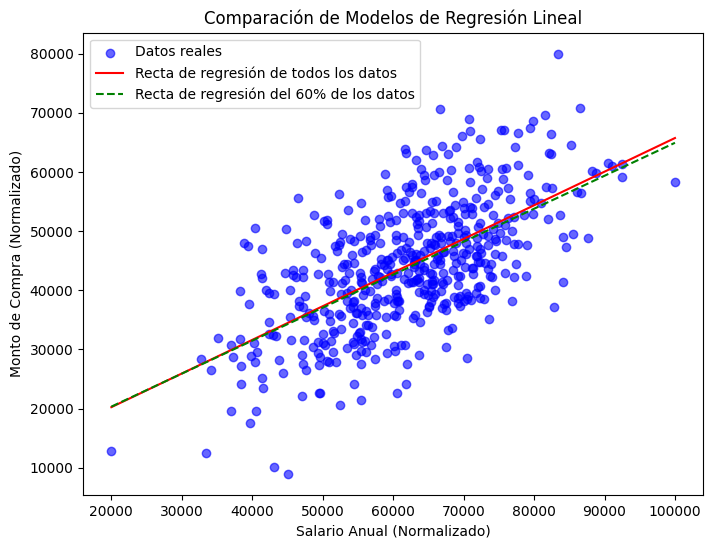

In [ ]:
#Valores para la linea de regresión
tl = np.linspace(min(X), max(X), 100)

#Graficar
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue', label='Datos reales', alpha=0.6)
plt.plot(tl, beta_0_original + beta_1_original * tl, color='red', label='Recta de regresión de todos los datos')
plt.plot(tl, beta_0_train_original + beta_1_train_original * tl, color='green', linestyle='dashed', label='Recta de regresión del 60% de los datos')
plt.xlabel('Salario Anual (Normalizado)')
plt.ylabel('Monto de Compra (Normalizado)')
plt.legend()
plt.title('Comparación de Modelos de Regresión Lineal')
plt.show()